In [72]:
#Rickord, Jake JJ
#2021-9-15
#Using Data to Improve a Marketing Promotion
#Determine what night would be the best to run a marketing promotion to increase attendance
#Show Box Plot, Scatter Plot, and Regression Model

In [87]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [74]:
#import the dataset and take a quick peek at it
df=pd.read_csv(r'C:\Users\Jake\Downloads\dodgers.csv')
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


First thing I see is that we have quite a few different types of promotions. While these no doubt can be investigated separately to address which provides the most attendance increase, our specific question to be answered asked about night of the week, not type of promotion. Let's combine those pieces into a single column to get attendance more broadly in a type of feature selection (more of a transformation).

In [75]:
for x in range(1,5):
    df[df.columns[-x]]=df[df.columns[-x]].replace('NO', 0)
    df[df.columns[-x]]=df[df.columns[-x]].replace('YES', 1)
df['Marketing Promotion']=df['cap']+df['shirt']+df['fireworks']+df['bobblehead']

In [76]:
del df['cap']
del df['shirt']
del df['fireworks']
del df['bobblehead']

In [77]:
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,Marketing Promotion
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,0
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,0
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,1
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,0
...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,0
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,0
78,OCT,1,33624,Monday,Giants,86,Clear,Night,0
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,0


Again addressing the question, it specifically asked what NIGHT to hold a marketing promotion, so let's drop out any day games that meddle in our data.

In [78]:
df=df[df['day_night']=="Night"]
df=df.reset_index()

Alright let's get an initial look into our attendance variable to see how the stat is distributed. We'll start with some measures of central tendency.

In [79]:
print(df['attend'].describe())

count       66.000000
mean     40868.893939
std       8551.130331
min      24312.000000
25%      33998.250000
50%      40358.000000
75%      46578.250000
max      56000.000000
Name: attend, dtype: float64


Looks like our average is hovering around 40K. Let's get a visual to understand the interquartile range effectively. We'll use a box plot for that.

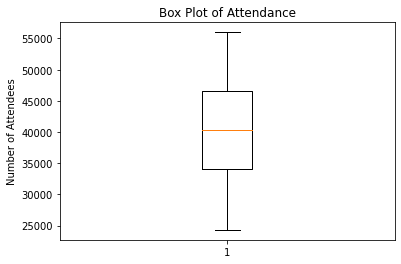

In [80]:
fig, ax=plt.subplots()
plt.title('Box Plot of Attendance')
ax.set_ylabel("Number of Attendees")
ax.boxplot(df['attend']);

Got it, really any datapoints outside that boundary should stand out for us. Let's examine our days of the week first now, to see how each compares to the interquartile range we see above.

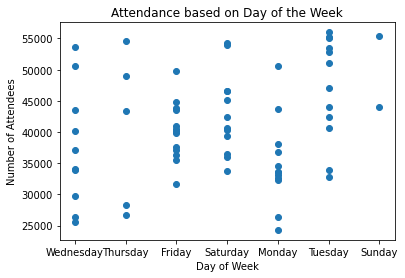

In [81]:
fig, ax=plt.subplots()
plt.title('Attendance based on Day of the Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Attendees')
ax.scatter(df['day_of_week'], df['attend']);

Interesting to see here, there are a few days of the week that have a few data points falling under, and some days over, the interquartile range we just discussed. Those above said range we won't worry about in this evaulation, as they seem to have attendance values on lock. Instead, let's hone in on those days falling under the IQR. To do so, we can zoom in on strictly those values meeting our criteria.

In [82]:
df2=df[df['attend']<33998.25]
df2=df2.reset_index()

From here, we can create a simple bar chart to tell us which day of the week has consistently low attendance numbers and highlight that day as ideal for the promotion.

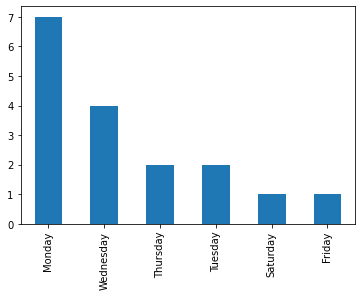

In [83]:
df2['day_of_week'].value_counts().plot(kind='bar');

From this analysis, we would say Monday would be the ideal day to target for increasing attendance, if we're strictly looking to increase attendance on the consistently worst day of attendance. We can also investigate a separate phenomenon, identifying which day has the greatest impact from promotions. Let's jump back to our first dataset.

In [86]:
df

,index,month,day,attend,day_of_week,opponent,temp,skies,day_night,Marketing Promotion
0,1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,0
1,2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,0
2,3,APR,13,31601,Friday,Padres,54,Cloudy,Night,1
3,4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,0
4,6,APR,23,26376,Monday,Braves,60,Cloudy,Night,0
...,...,...,...,...,...,...,...,...,...,...
61,75,SEP,28,37133,Friday,Rockies,77,Clear,Night,1
62,76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,0
63,78,OCT,1,33624,Monday,Giants,86,Clear,Night,0
64,79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,0


Having that Marketing Promotion as a discrete value will come in clutch here to examine this as a logistic regression modeling situation. Let's run a model by subsetting each dataset by day and identifying impact of promotion from there.

In [94]:
for day in df['day_of_week'].unique():
    df_subset=df[df['day_of_week']==day]
    model=LinearRegression()
    x=df_subset['Marketing Promotion'].values.reshape(-1, 1)
    model.fit(x, df_subset['attend'])
    r_sq=model.score(x, df_subset['attend'])
    print('coefficient of determination for ', day, ' is ', r_sq)
    print('intercept is ', model.intercept_)
    print('slope is ', model.coef_)

coefficient of determination for  Wednesday  is  0.3500624054817145
intercept is  35655.666666666664
slope is  [17914.33333333]
coefficient of determination for  Thursday  is  0.7037820225760137
intercept is  32803.333333333336
slope is  [19010.16666667]
coefficient of determination for  Friday  is  0.0
intercept is  40116.92307692308
slope is  [0.]
coefficient of determination for  Saturday  is  0.6211489610725576
intercept is  40747.5
slope is  [13380.5]
coefficient of determination for  Monday  is  0.4912909324769106
intercept is  33548.090909090904
slope is  [17010.90909091]
coefficient of determination for  Tuesday  is  0.1188413196432272
intercept is  43196.0
slope is  [5785.5]
coefficient of determination for  Sunday  is  1.0
intercept is  44005.0
slope is  [11354.]


Two oddballs there, with Friday and Sunday sticking out. Let's give them a look.

In [97]:
print(df[df['day_of_week']=='Friday'])
print(df[df['day_of_week']=='Sunday'])

    index month  day  attend day_of_week   opponent  temp   skies day_night  \
2       3   APR   13   31601      Friday     Padres    54  Cloudy     Night   
7       9   APR   27   44807      Friday  Nationals    66  Clear      Night   
12     15   MAY   11   35591      Friday    Rockies    65  Clear      Night   
16     20   MAY   18   40906      Friday  Cardinals    64  Clear      Night   
19     23   MAY   25   36283      Friday     Astros    59  Cloudy     Night   
28     33   JUN   15   40432      Friday  White Sox    67  Clear      Night   
31     37   JUN   29   49763      Friday       Mets    72  Clear      Night   
36     43   JUL   13   43873      Friday     Padres    76  Cloudy     Night   
42     52   AUG    3   43537      Friday       Cubs    73  Clear      Night   
50     61   AUG   24   39805      Friday    Marlins    71  Clear      Night   
53     65   AUG   31   37622      Friday     Snakes    77  Clear      Night   
59     72   SEP   14   40167      Friday  Cardinals 

Ah, seems that the sample sizes seem to be the causes for those oddities. Friday has no days without a promotion, and Sunday has only two samples in the data.

Excluding those two, we should really hone in on those slopes. It appears that holding a promotion on a Thursday not only increases the attendance the best (19,010 on the slope), but also looking at R-squared values, ~70% of the variance in marketing promotions explains the variance in attendance output. So, examining solely this stat, if we're looking to increase attendance without regard to average attendance, Thursday would be our best bet.